<a href="https://colab.research.google.com/github/d-vasily/hse_deep_learning/blob/hw_02/hw_2/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# В конце этого семинара - домашка!

# PyTorch

## __Tensors__

Одно из основных понятий в PyTorch -- это __Tenosor__. 

https://pytorch.org/docs/master/tensors.html

__Tensor__ -- это такой же массив, как и в __numpy.array__, размерность и тип данных которого мы можем задать. Tensor в отличие от numpy.array может вычисляться на __GPU__.

In [ ]:
import numpy as np
# import torch
import matplotlib.pyplot as plt
import seaborn as sns

import warnings         # чтобы никто не мешал бесчинствам с кодом
warnings.filterwarnings("ignore") # обработка всевозсожных warnings путем их игнорирования

plt.style.use('ggplot')
%matplotlib inline

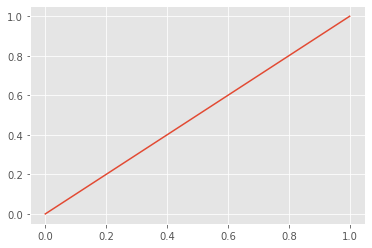

In [ ]:
plt.plot([0,1], [0,1])

In [ ]:
def plot(histories):
    plt.figure(figsize=(16,10))
    for name, val_loss in histories:
        plt.plot(val_loss, label=name)
    plt.legend()
    plt.show()

In [ ]:
import torch


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU


# Домашние задание

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градинеты с тем, как считает PyTorch AutoGrad.

In [ ]:
batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1

# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

# Randomly initialize weights
w1_0 = torch.randn(input_size, hidden_size, device=device, dtype=dtype, requires_grad=True)
w2_0 = torch.randn(hidden_size, output_size, device=device, dtype=dtype, requires_grad=True)

# Randomly initialize bias
b1_0 = torch.randn(1, hidden_size, device=device, dtype=dtype, requires_grad=True)
b2_0 = torch.randn(1, output_size, device=device, dtype=dtype, requires_grad=True)

### selfmade

In [ ]:
w1 = w1_0.clone()
w2 = w2_0.clone()
b1 = b1_0.clone()
b2 = b2_0.clone()
loss_self = []

In [ ]:
learning_rate = 1e-4
for t in range(1001):
    # Forward pass: compute predicted y
    #TODO
    h_1 = x.mm(w1) + b1
    h_relu = h_1.clamp(min=0)
    out = h_relu.mm(w2) + b2
    
    # Compute and print loss
    loss = (out - y).pow(2).sum().item()
    
    # Backward pass: 
    dloss_dout = 2 * (out - y)
    
    grad_h_1 = dloss_dout.mm(w2.t())
    grad_h_1[h_1 < 0] = 0
    
    grad_w2 = h_relu.t().mm(dloss_dout) 
    grad_b2 = dloss_dout
    
    grad_w1 = x.t().mm(grad_h_1)
    grad_b1 = grad_h_1
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1.sum()
    b2 -= learning_rate * grad_b2.sum()
    if t % 20 == 0:
        loss_self.append(loss)
    if t % 100 == 0:
        print('Loss on iteration {} = {}'.format(t, loss))
    

Loss on iteration 0 = 917.59326171875
Loss on iteration 100 = 75.75376892089844
Loss on iteration 200 = 67.88298034667969
Loss on iteration 300 = 64.62751770019531
Loss on iteration 400 = 62.98029708862305
Loss on iteration 500 = 62.21332550048828
Loss on iteration 600 = 61.83816146850586
Loss on iteration 700 = 61.58525085449219
Loss on iteration 800 = 61.41177749633789
Loss on iteration 900 = 61.26057052612305
Loss on iteration 1000 = 61.1065559387207


### PyTorch AutoGrad

In [ ]:
w1 = w1_0
w2 = w2_0
b1 = b1_0
b2 = b2_0
loss_auto = []

In [ ]:
learning_rate = 1e-4
for t in range(1001):
    y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 0:
        print(t, loss.item())
    
    # Теперь подсчет градиентов для весов происходит при вызове backward
    loss.backward()
   
    # Обновляем значение весов, но укзаываем, чтобы PyTorch не считал эту операцию, 
    # которая бы учавствовала бы при подсчете градиентов в chain rule
    with torch.no_grad():          
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad
        
        # Теперь обнуляем значение градиентов, чтобы на следующем шаге 
        # они не учитывались при подсчете новых градиентов,
        # иначе произойдет суммирвоание старых и новых градиентов
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

0 917.59326171875
100 77.57720947265625
200 71.0570068359375
300 67.52696228027344
400 65.16240692138672
500 63.45138931274414
600 62.04493713378906
700 61.295143127441406
800 60.86152267456055
900 60.50575637817383
1000 60.293724060058594


Есть небольшие различия, скорее всего из-за округлений в математических операциях.